**Table of contents**<a id='toc0_'></a>    
- 1. [Plot synchronization stack    ](#toc1_)    
- 2. [Load results from synchronization analysis   ](#toc2_)    
- 3. [Aggregate figures  ](#toc3_)    
  - 3.1. [Synchronization vs perturbation ](#toc3_1_)    
  - 3.2. [Stats](#toc3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>Plot synchronization stack     [&#128285;](#toc0_)

In [22]:
# Imports
import pickle

import numpy as np
import matplotlib.pyplot as plt

# 2. <a id='toc2_'></a>Load results from synchronization analysis    [&#128285;](#toc0_)

In [23]:
n_datasets = 3

In [24]:
# Parameters
mag_min = 1.5  # the minimum magnitude of the considered earthquakes
dx = 10.  # in km, the along-strike bin size to compute the correlation length, the average number of felt earthquakes...
cc_thr = 0.07  # the correlation coefficient threshold to measure the correlation length

In [25]:
# Load Cascadia
filename = "casc_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

cascadia = pickle.load(open(path, "rb"))

casc_eq = cascadia['n_close_eq']
casc_cc_d = cascadia['corr_length']

Loading results/casc_synch_mc1.5_dx10_cc0.07.pkl


In [26]:
# Load Nankai
filename = "nank_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

nankai = pickle.load(open(path, "rb"))

nank_eq = nankai['n_close_eq']
nank_cc_d = nankai['corr_length']

Loading results/nank_synch_mc1.5_dx10_cc0.07.pkl


In [27]:
# Load Alaska
filename = "ak_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

alaska = pickle.load(open(path, "rb"))

ak_eq = alaska['n_close_eq']
ak_cc_d = alaska['corr_length']

Loading results/ak_synch_mc1.5_dx10_cc0.07.pkl


In [28]:
# Load Mexico
filename = "mex_synch_mc{:.1f}_dx{:d}_cc{:.2f}.pkl".format(mag_min, int(dx), cc_thr)
path = "results/" + filename
print("Loading", path)

mexico = pickle.load(open(path, "rb"))

mex_eq = mexico['n_close_eq']
mex_cc_d = mexico['corr_length']

Loading results/mex_synch_mc1.5_dx10_cc0.07.pkl


# 3. <a id='toc3_'></a>Aggregate figures   [&#128285;](#toc0_)

## 3.1. <a id='toc3_1_'></a>Synchronization vs perturbation  [&#128285;](#toc0_)

In [37]:
dist_to_trm = 50

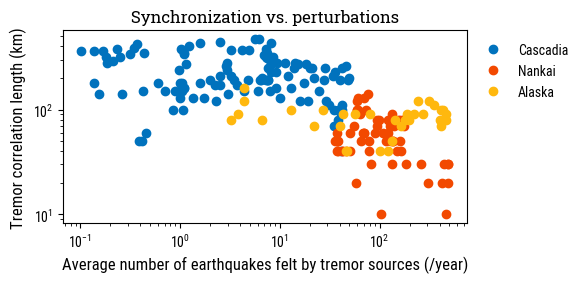

In [38]:
# Plot
fig, ax = plt.subplots(figsize=(6, 3))

ax.set_xlabel('Average number of earthquakes felt by tremor sources (/year)')
ax.set_ylabel('Tremor correlation length (km)')
ax.set_title('Synchronization vs. perturbations', fontname='Roboto Slab', fontsize=12)

ax.plot(casc_eq[dist_to_trm], casc_cc_d, 'o', label='Cascadia')
ax.plot(nank_eq[dist_to_trm], nank_cc_d, 'o', label='Nankai')
ax.plot(ak_eq[dist_to_trm], ak_cc_d, 'o', label='Alaska')
# ax.plot(mex_eq[dist_to_trm], mex_cc_d, 'o', label='Mexico')
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend(fontsize='small', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

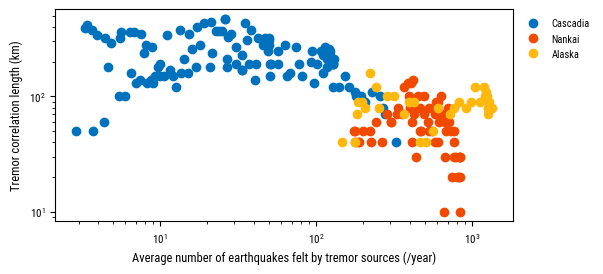

In [31]:
# Plot for paper
with plt.style.context('grl'):
    fig, ax = plt.subplots(figsize=np.array([15, 7]) / 2.54)
    ax.set_xlabel('Average number of earthquakes felt by tremor sources (/year)')
    ax.set_ylabel('Tremor correlation length (km)')

    ax.plot(casc_eq[dist_to_trm], casc_cc_d, 'o', label='Cascadia')
    ax.plot(nank_eq[dist_to_trm], nank_cc_d, 'o', label='Nankai')
    ax.plot(ak_eq[dist_to_trm], ak_cc_d, 'o', label='Alaska')

    ax.set_xscale('log')
    ax.set_yscale('log')

    ax.legend(fontsize='small', bbox_to_anchor=(1, 1), loc='upper left')

    plt.show()

## 3.2. <a id='toc3_2_'></a>Stats [&#128285;](#toc0_)

In [32]:
dist_to_trm = 50

In [33]:
# # Compute slope, correlation coeff and significance of the linear regression (Linear fit)
# from scipy.stats import linregress

# # --> Cascadia
# no_nan = ~np.isnan(casc_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
# slope_casc, intercept_casc, r_value_casc, p_value_casc, std_err_casc = linregress(casc_eq[dist_to_trm][no_nan], casc_cc_d[no_nan])

# SSres = np.sum((casc_cc_d[no_nan] - (slope_casc * casc_eq[dist_to_trm][no_nan] + intercept_casc))**2)  # sum of squares of residuals
# SStot = np.sum((casc_cc_d[no_nan] - np.mean(casc_cc_d[no_nan]))**2)  # total sum of squares
# r2_casc = 1 - SSres / SStot

# # --> Nankai
# no_nan = ~np.isnan(nank_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
# slope_nank, intercept_nank, r_value_nank, p_value_nank, std_err_nank = linregress(nank_eq[dist_to_trm][no_nan], nank_cc_d[no_nan])

# SSres = np.sum((nank_cc_d[no_nan] - (slope_nank * nank_eq[dist_to_trm][no_nan] + intercept_nank))**2)  # sum of squares of residuals
# SStot = np.sum((nank_cc_d[no_nan] - np.mean(nank_cc_d[no_nan]))**2)  # total sum of squares
# r2_nank = 1 - SSres / SStot

# # --> Alaska
# no_nan = ~np.isnan(ak_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
# slope_ak, intercept_ak, r_value_ak, p_value_ak, std_err_ak = linregress(ak_eq[dist_to_trm][no_nan], ak_cc_d[no_nan])

# SSres = np.sum((ak_cc_d[no_nan] - (slope_ak * ak_eq[dist_to_trm][no_nan] + intercept_ak))**2)  # sum of squares of residuals
# SStot = np.sum((ak_cc_d[no_nan] - np.mean(ak_cc_d[no_nan]))**2)  # total sum of squares
# r2_ak = 1 - SSres / SStot

In [34]:
# Compute slope, correlation coeff and significance of the linear regression (Log fit)
from scipy.stats import linregress

# --> Cascadia
no_nan = ~np.isnan(casc_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
no_0 = (casc_eq[dist_to_trm] > 0) & (casc_cc_d > 0)

casc_eq_log = np.log10(casc_eq[dist_to_trm][no_nan & no_0])
casc_cc_d_log = np.log10(casc_cc_d[no_nan & no_0])

slope_casc, intercept_casc, r_value_casc, p_value_casc, std_err_casc = linregress(casc_eq_log, casc_cc_d_log)

SSres = np.sum((casc_cc_d_log - (slope_casc * casc_eq_log + intercept_casc))**2)  # sum of squares of residuals
SStot = np.sum((casc_cc_d_log - np.mean(casc_cc_d_log))**2)  # total sum of squares
r2_casc = 1 - SSres / SStot

# --> Nankai
no_nan = ~np.isnan(nank_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
no_0 = (nank_eq[dist_to_trm] > 0) & (nank_cc_d > 0)

nank_eq_log = np.log10(nank_eq[dist_to_trm][no_nan & no_0])
nank_cc_d_log = np.log10(nank_cc_d[no_nan & no_0])

slope_nank, intercept_nank, r_value_nank, p_value_nank, std_err_nank = linregress(nank_eq_log, nank_cc_d_log)

SSres = np.sum((nank_cc_d_log - (slope_nank * nank_eq_log + intercept_nank))**2)  # sum of squares of residuals
SStot = np.sum((nank_cc_d_log - np.mean(nank_cc_d_log))**2)  # total sum of squares
r2_nank = 1 - SSres / SStot

# --> Alaska
no_nan = ~np.isnan(ak_cc_d)  # cc_d is nan when no tremor in the bin (gap in the along-strike distribution)
no_0 = (ak_eq[dist_to_trm] > 0) & (ak_cc_d > 0)

ak_eq_log = np.log10(ak_eq[dist_to_trm][no_nan & no_0])
ak_cc_d_log = np.log10(ak_cc_d[no_nan & no_0])

slope_ak, intercept_ak, r_value_ak, p_value_ak, std_err_ak = linregress(ak_eq_log, ak_cc_d_log)

SSres = np.sum((ak_cc_d_log - (slope_ak * ak_eq_log + intercept_ak))**2)  # sum of squares of residuals
SStot = np.sum((ak_cc_d_log - np.mean(ak_cc_d_log))**2)  # total sum of squares
r2_ak = 1 - SSres / SStot

/var/folders/_0/w1st1dg91_l80my3nlzkvb_w0000gn/T/ipykernel_96962/3078497762.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])


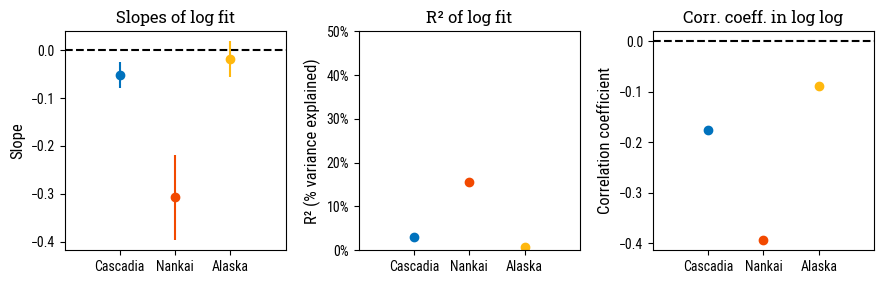

In [36]:
# Plot
fig, ax = plt.subplots(1, 3, figsize=(9, 3))
for a in ax:
    a.set_xlim(0, n_datasets + 1)
    a.set_xticks(np.arange(1, n_datasets + 1))
    a.set_xticklabels(['Cascadia', 'Nankai', 'Alaska'])


ax[0].set_title('Slopes of log fit', fontname='Roboto Slab', fontsize=12)
ax[0].set_ylabel('Slope')


ax[0].axhline(0, color='black', ls='--')
ax[0].errorbar(1, slope_casc, yerr=std_err_casc, fmt='o', label='Cascadia')
ax[0].errorbar(2, slope_nank, yerr=std_err_nank, fmt='o', label='Nankai')
ax[0].errorbar(3, slope_ak, yerr=std_err_ak, fmt='o', label='Alaska')

ax[1].set_title('R² of log fit', fontname='Roboto Slab', fontsize=12)
ax[1].set_ylabel('R² (% variance explained)')

ax[1].set_ylim(0, .5)
vals = ax[1].get_yticks()
ax[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax[1].plot(1, r2_casc, 'o', label='Cascadia')
ax[1].plot(2, r2_nank, 'o', label='Nankai')
ax[1].plot(3, r2_ak, 'o', label='Alaska')

ax[2].set_title('Corr. coeff. in log log', fontname='Roboto Slab', fontsize=12)
ax[2].set_ylabel('Correlation coefficient')

ax[2].axhline(0, color='black', ls='--')
ax[2].plot(1, r_value_casc, 'o', label='Cascadia')
ax[2].plot(2, r_value_nank, 'o', label='Nankai')
ax[2].plot(3, r_value_ak, 'o', label='Alaska')


plt.tight_layout()
plt.show()